## Automated Parking system with Machine learning

### Statement: "Design and Develop a automated parking system using ML , use pictures to detect the car numbers and allocate a parking spot "

### Goal: Understand image detection of car number plate recognition and improve the accuracy. 

--------------------------------------------------------------------------------------------------------------------

### 1. The first thing we need to do is to import the required packages.

In [334]:
from easyocr import Reader
import cv2
import imutils
import time
from matplotlib import pyplot as plt
import pandas as pd

### 2. Then we load our image
If required you can resize the image using cv2 or imutils

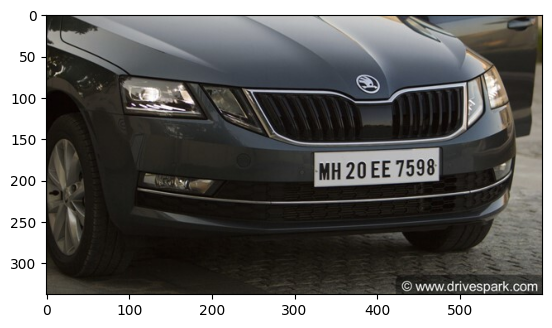

In [335]:
image = cv2.imread('images/4.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Convert the input image to grayscale

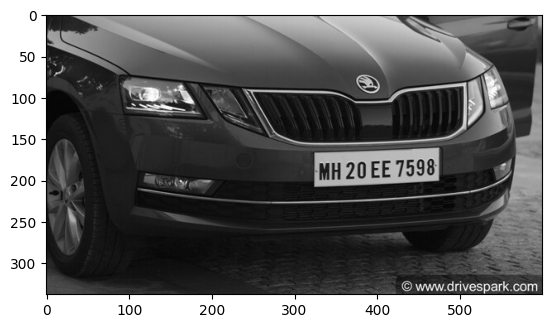

In [336]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### 3. Apply blur to image, and detect the edges  

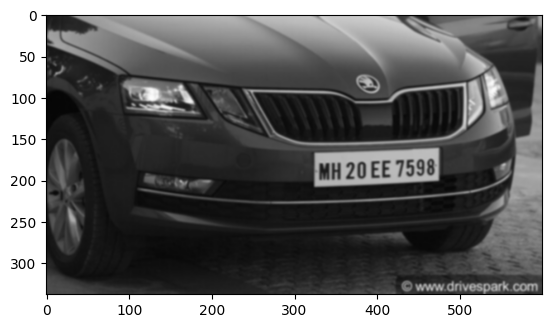

In [337]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

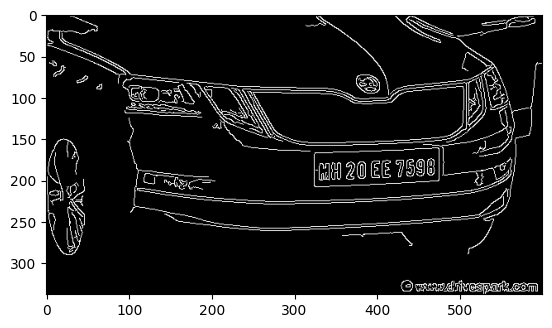

In [338]:
edged = cv2.Canny(blur, 10, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

#### = > We convert our image to grayscale
#### = >Remove some noise by applying a Gaussian blur
#### = >Finally detect the edges using the Canny edge detector.

--------------------------------------------------------------------------------------------------------------------

### 4. Next, we need to find the contours on the image and extract the contour of the license plate

In [339]:
# find the contours, sort them, and keep only the 5 largest ones
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
n_plate_cnt = None
    # loop over the contours
for c in contours:
    # approximate each contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if the contour has 4 points, we can say
    # that we have found our license plate
    if len(approx) == 4:
        n_plate_cnt = approx
        break        

In [340]:
if  n_plate_cnt is None:
    detected = 0
    print ("No contour detected")
# get the bounding box of the contour and 
# extract the license plate from the image
(x, y, w, h) = cv2.boundingRect(n_plate_cnt)
license_plate = gray[y:y + h, x:x + w]

#### We used our edged image to find the contours and then sort them from biggest to smallest and keep the 5 largest ones.

#### We then go through the contours, approximate each one, and if we found a contour with four points we can say that we have found our license plate.

#### So next, we get the bounding box of the license plate's contour and we use Numpy slicing to extract the number plate from the image.

--------------------------------------------------------------------------------------------------------------------

### 5. Now we are ready to perform Optical Character Recognition using the EasyOCR package

In [347]:
reader = Reader(['en'])
# detect the text from the license plate
detection = reader.readtext(license_plate)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


#### We first initialize the Reader object and then use the readtext function passing it our license plate image.

#### This will return a list containing 3 elements: the first one is the bounding box of the text, the second element is the detect text, and the last one is the confidence for the detection.

#### In the case where the length of the returned list is equal to 0, this means that the function couldn't detect the text. So we display a custom message to the end-user.

#### In case the length of the returned list is 0, this means that the function couldn't detect the text. So we display a custom message to the user.

#### Otherwise, we draw the contour of the license plate on the image along with the detected text and its probability.

--------------------------------------------------------------------------------------------------------------------

### 6. Check for the text and update it to csv file.

In [348]:
 if len(detection) == 0:
        # if the text couldn't be read, show a custom message
        text = "Unable to detect"
        cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
        image = cv2.resize(image, (500, 350))
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
else:
        # draw the contour and write the detected text on the image
        cv2.drawContours(image, [n_plate_cnt], -1, (0, 255, 0), 3)
        text = detection[0][1]
        accu = f"{detection[0][2] * 100:.2f}%"
        text3= f"{detection[0][1]} {detection[0][2] * 100:.2f}%"

        cv2.putText(image,text3, (x-20, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 3)
        image = cv2.resize(image, (500,350))
        cv2.imshow('license plate', license_plate)
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        raw_data = {'date': [time.asctime( time.localtime(time.time()))], 
                    'v_number': [text],'accuracy':[accu]}
        df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
        df.to_csv('data.csv',mode='a',index=False, header=False)
        # Print recognized text
        print(text3)

MH 20 EE 7598 91.35%


#### Finally the detected text is updated to a csv file with data and text as data.
##### If no text detected we display a message to the user.


#### Here we see car number is " MH 20 EE 7598 "  and with 91.35% accuracy.

--------------------------------------------------------------------------------------------------------------------

### Now we define a function and test for all images in the folder. 

### This can be made a python file and use for image detection, having images folder.

In [1]:
def imageDetection(img_path):
    from easyocr import Reader
    import cv2
    import imutils
    import time
    import pandas as pd
   
    image = cv2.imread(img_path) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (5,5), 0) 
    edged = cv2.Canny(blur, 10, 200) 


    contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
    
    n_plate_cnt = None
    
    for c in contours:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            n_plate_cnt = approx
            break        
    
    
    if  n_plate_cnt is None:
        detected = 0
        print ("No contour detected", img_path)
        text = "Unable to detect"
        cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
        image = cv2.resize(image, (500, 350))
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return
    
    (x, y, w, h) = cv2.boundingRect(n_plate_cnt)
    license_plate = gray[y:y + h, x:x + w]

    
    reader = Reader(['en'])
    detection = reader.readtext(license_plate)


    if len(detection) == 0:
        text = "Unable to detect"
        cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
        image = cv2.resize(image, (500, 350))
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    else:
        cv2.drawContours(image, [n_plate_cnt], -1, (0, 255, 0), 3)
        text = detection[0][1]
        accu = f"{detection[0][2] * 100:.2f}%"
        final_text = f"{detection[0][1]} {detection[0][2] * 100:.2f}%"

        cv2.putText(image,final_text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 3)
        image = cv2.resize(image, (500,350))
        cv2.imshow('license plate', license_plate)
        cv2.imshow('Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        raw_data = {'date': [time.asctime( time.localtime(time.time()) )], 
            'v_number': [text]}

        df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
        df.to_csv('data.csv',mode='a',index=False, header=False)

        print(img_path,final_text)
    
for i in range(1,16):
    imageDetection('images/'+str(i)+'.jpg')


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/2.jpg HR 13 H 0025 80.97%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/3.jpg NHO 1BR2286 46.37%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/4.jpg MH 20 EE 7598 91.35%
images/5.jpg DL7C N 5617 93.79%
No contour detected images/6.jpg
No contour detected images/7.jpg


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/8.jpg APO5 BL 6339 42.77%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/9.jpg IND 82.29%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/10.jpg KA 03 MW 0400 66.74%
images/11.jpg MH13 BN8454 54.88%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/12.jpg IND 99.90%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


images/13.jpg ML 05 $ 7595 53.59%
images/14.jpg MHIZ DE4433 58.93%
No contour detected images/15.jpg
